## 2.3 监督学习算法

In [26]:
# 导入需要的库
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import mglearn

### 2.3.1 一些样本数据集

#### 2.3.1.1 forge数据集：二分类数据集

X.shape: (26, 2)


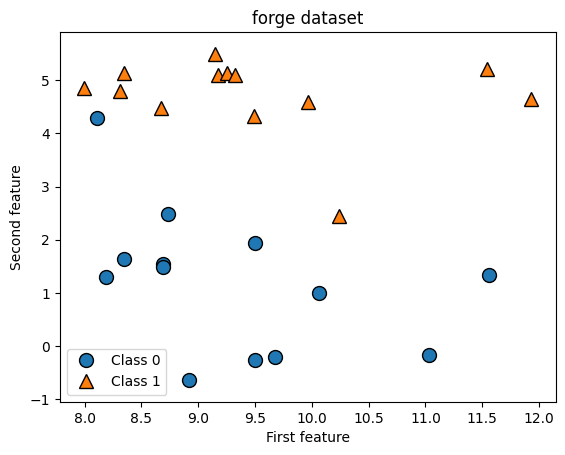

In [3]:
# 一个模拟的二分类数据集示例是forge数据集
# 生成forge数据集
X, y = mglearn.datasets.make_forge()
# 数据集绘图
mglearn.discrete_scatter(X[:, 0], X[:, 1], y)
plt.legend(["Class 0", "Class 1"], loc=3)
plt.xlabel("First feature")
plt.ylabel("Second feature")
plt.title("forge dataset")
print("X.shape: {}".format(X.shape))
plt.show()

#### 2.3.1.2 wave数据集：回归算法

X.shape: (40, 1)


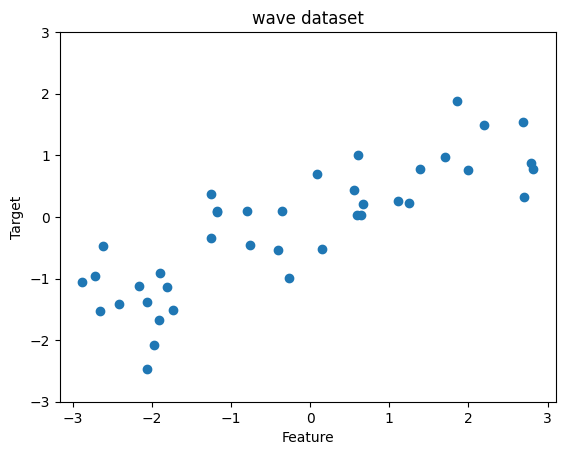

In [11]:
# 模拟的wave数据集说明回归算法
# wave数据集只有一个输入特征和一个连续的目标变量（或响应），后者是模型想要预测的对象
X, y = mglearn.datasets.make_wave(n_samples=40)
print("X.shape: {}".format(X.shape))
plt.plot(X, y, 'o')
plt.ylim(-3, 3)
plt.xlabel("Feature")
plt.ylabel("Target")
plt.title("wave dataset")
plt.show()

#### 2.3.1.3 cancer数据集：威斯康星州乳腺癌数据集 (分类算法)

每个肿瘤都被标记为“良性”(benign，表示无害肿瘤)或“恶性”(malignant，表示癌性肿瘤)，模型的任务是基于人体组织的测量数据来学习预测肿瘤是否为恶性。

In [18]:
# 用scikit-learn模块的load_breast_cancer函数来加载数据
from sklearn.datasets import load_breast_cancer
cancer = load_breast_cancer()
print("cancer.keys(): \n{}".format(cancer.keys()))

cancer.keys(): 
dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])


In [19]:
# cancer数据集共包含569个数据点，每个数据点有30个特征
print("cancer.data.shape: {}".format(cancer.data.shape))

cancer.data.shape: (569, 30)


In [22]:
# 在369个数据点中，212个被标记为恶性，357个被标记为良性
print("Sample counts per class:\n{}".format(
    {n: v for n, v in zip(cancer.target_names, np.bincount(cancer.target))}
))

Sample counts per class:
{np.str_('malignant'): np.int64(212), np.str_('benign'): np.int64(357)}


In [23]:
# 通过feature_names属性可以了解每个特征的语义说明
print("Feature names:\n{}".format(cancer.feature_names))

Feature names:
['mean radius' 'mean texture' 'mean perimeter' 'mean area'
 'mean smoothness' 'mean compactness' 'mean concavity'
 'mean concave points' 'mean symmetry' 'mean fractal dimension'
 'radius error' 'texture error' 'perimeter error' 'area error'
 'smoothness error' 'compactness error' 'concavity error'
 'concave points error' 'symmetry error' 'fractal dimension error'
 'worst radius' 'worst texture' 'worst perimeter' 'worst area'
 'worst smoothness' 'worst compactness' 'worst concavity'
 'worst concave points' 'worst symmetry' 'worst fractal dimension']


In [ ]:
# 通过cancer.DESCR属性可以了解数据的更多信息
print("Feature description:\n{}".format(cancer.DESCR))

Feature description:
.. _breast_cancer_dataset:

Breast cancer Wisconsin (diagnostic) dataset
--------------------------------------------

**Data Set Characteristics:**

:Number of Instances: 569

:Number of Attributes: 30 numeric, predictive attributes and the class

:Attribute Information:
    - radius (mean of distances from center to points on the perimeter)
    - texture (standard deviation of gray-scale values)
    - perimeter
    - area
    - smoothness (local variation in radius lengths)
    - compactness (perimeter^2 / area - 1.0)
    - concavity (severity of concave portions of the contour)
    - concave points (number of concave portions of the contour)
    - symmetry
    - fractal dimension ("coastline approximation" - 1)

    The mean, standard error, and "worst" or largest (mean of the three
    worst/largest values) of these features were computed for each image,
    resulting in 30 features.  For instance, field 0 is Mean Radius, field
    10 is Radius SE, field 20 is 

#### 2.3.1.4 波士顿房价数据集（回归算法）

与此数据集相关的任务是，利用犯罪率、是否邻近查尔斯河、公路可达性等信息，来预测20世纪70年代波士顿地区房屋价格的中位数

In [25]:
# 波士顿房价数据集包含506个数据点和13个特征
from sklearn.datasets import load_boston

ImportError: 
`load_boston` has been removed from scikit-learn since version 1.2.

The Boston housing prices dataset has an ethical problem: as
investigated in [1], the authors of this dataset engineered a
non-invertible variable "B" assuming that racial self-segregation had a
positive impact on house prices [2]. Furthermore the goal of the
research that led to the creation of this dataset was to study the
impact of air quality but it did not give adequate demonstration of the
validity of this assumption.

The scikit-learn maintainers therefore strongly discourage the use of
this dataset unless the purpose of the code is to study and educate
about ethical issues in data science and machine learning.

In this special case, you can fetch the dataset from the original
source::

    import pandas as pd
    import numpy as np

    data_url = "http://lib.stat.cmu.edu/datasets/boston"
    raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
    data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
    target = raw_df.values[1::2, 2]

Alternative datasets include the California housing dataset and the
Ames housing dataset. You can load the datasets as follows::

    from sklearn.datasets import fetch_california_housing
    housing = fetch_california_housing()

for the California housing dataset and::

    from sklearn.datasets import fetch_openml
    housing = fetch_openml(name="house_prices", as_frame=True)

for the Ames housing dataset.

[1] M Carlisle.
"Racist data destruction?"
<https://medium.com/@docintangible/racist-data-destruction-113e3eff54a8>

[2] Harrison Jr, David, and Daniel L. Rubinfeld.
"Hedonic housing prices and the demand for clean air."
Journal of environmental economics and management 5.1 (1978): 81-102.
<https://www.researchgate.net/publication/4974606_Hedonic_housing_prices_and_the_demand_for_clean_air>


In [ ]:
# 获取波士顿房价数据集的另外方法，可以看到有506个数据点和2个特征
# data_url = "http://lib.stat.cmu.edu/datasets/boston"
data_url = "./ref/boston.txt"
# raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
raw_df = pd.read_csv(data_url, skiprows=22, header=None)
data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
# target = raw_df.values[1::2, 2]
print(data.shape)

(506, 2)


In [38]:
# Alternative datasets include the California housing dataset and the
# Ames housing dataset. You can load the datasets as follows::

from sklearn.datasets import fetch_california_housing
housing = fetch_california_housing()
print("housing shape: {}".format(housing.data.shape))

c:\Users\v0cn037\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\datasets\_base.py:1519: UserWarning: Retry downloading from url: https://ndownloader.figshare.com/files/5976036
  warnings.warn(f"Retry downloading from url: {remote.url}")


URLError: <urlopen error [SSL: CERTIFICATE_VERIFY_FAILED] certificate verify failed: Missing Authority Key Identifier (_ssl.c:1032)>